In [1]:
#import packages and libraries  
import csv
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import os
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Exploratory Data Analysis 

In [3]:
#read the raw data to see and check the training data 
with open('train.txt', newline = '') as train_data:                                                                                          
    train_reader = csv.reader(train_data, delimiter='\t')
    for train_data in train_reader:
        print(train_data)

['540762', '1912140', '1537559', '3091331', '2757277', '3237295', '1070876', '4008078', '1824878', '1005927', '2703564', '2519640', '3370407', '3883660', '2173241', '1726071', '2451654', '3906434', '2635670', '3294915', '2763417', '1116703', '261881', '2404108', '3521384', '2299939', '2989624', '4361289', '3314815', '3367669', '641925', '2862019', '1274046', '4316209', '2463912', '3043', '952976', '3532986', '415955', '4366854', '267263', '1199298', '1840280', '581535', '4241326', '4267183', '2881471', '2737722', '4286284', '333573', '1594907', '3056533', '2163471', '3712732', '2672578', '1209171', '1003239', '4818002', '3201437', '1892251', '2800259', '141083', '2558493', '1655093', '4313335', '738638', '3702208', '1124524', '1436216', '3206499', '1462439', '2345899', '4131275', '1169783', '2152173', '4174165', '141067', '3118623', '1521082', '3912913', '299865', '193736', '3562621', '94742', '2464827', '1719625', '557514', '1313296', '2329535', '3662772', '3980998', '695775', '381025

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# convert the training data txt file from to csv (optional)
#lstFile = ('train.txt'.split("."))
#file =  open("train.txt", "r", encoding= 'latin-1')
#lstInput = []
#for line in file:
#    try:
 #       lstLine = line.replace("\n","").split("\t")
#    except Exception as e :
 #       print (e)
#        pass
#    lstInput.append(lstLine)
#file.close()
        
    
#outputFile = open(lstFile [0]+"train_dataset.csv", "w", encoding = 'ascii')
#for line in lstInput:
#        writeLine = ",".join(line)
#        outputFile.write(writeLine + "\n")
        
#outputFile.close()

In [ ]:
#col_names = [1,2,3,4,5, ...]
#df = pd.read_csv("train_dataset.csv", header=None) 
# Preview the first 5 lines of the loaded data 
#pd.set_option('display.max_columns',None)
#display(df)

In [2]:
#Extract the directed graph from the raw training data to understand the data
with open('train.txt', 'r') as train_data:
        G=nx.DiGraph() # directed graph
        for line in train_data:
            neighbours=[int(i) for i in line.split()]
            neighbour_tuples=[(neighbours[0],neighbours[i+1]) for i in range(len(neighbours)-1)]
            G.add_edges_from(neighbour_tuples)

In [3]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 4867136
Number of edges: 23946602
Average in degree:   4.9201
Average out degree:   4.9201


In [25]:
neighbour_tuples

[(3547024, 2888992),
 (3547024, 179459),
 (3547024, 492114),
 (3547024, 2418495),
 (3547024, 2235094),
 (3547024, 1408134),
 (3547024, 554490),
 (3547024, 1997720),
 (3547024, 4382216),
 (3547024, 3136622),
 (3547024, 4596817),
 (3547024, 873218),
 (3547024, 3407290),
 (3547024, 168122),
 (3547024, 4496572),
 (3547024, 4551758),
 (3547024, 3477263),
 (3547024, 3916163),
 (3547024, 2953672),
 (3547024, 113603),
 (3547024, 4545022),
 (3547024, 1461794),
 (3547024, 856265),
 (3547024, 2562678),
 (3547024, 991648),
 (3547024, 4013682),
 (3547024, 1853136),
 (3547024, 4780148),
 (3547024, 1093702),
 (3547024, 288019),
 (3547024, 3420937),
 (3547024, 1526027),
 (3547024, 2671044),
 (3547024, 895854),
 (3547024, 3387648),
 (3547024, 1594835),
 (3547024, 4019767),
 (3547024, 2050523),
 (3547024, 4000575),
 (3547024, 1098659),
 (3547024, 4691571),
 (3547024, 3977270),
 (3547024, 4451299),
 (3547024, 4064320),
 (3547024, 191183),
 (3547024, 452329),
 (3547024, 3833283),
 (3547024, 1108982),
 (35

In [26]:
# # build the pair nodes
# with open("train.txt", "r") as relation_map:
#     relation_mapping = dict()
#     for relation in relation_map:
#         aid, *nodes = map(int, relation.split())
#         relation_mapping.update({aid: nodes})
#     train = [[], []]
#     for n1, ln2 in relation_mapping.items():
#         for p_ln2 in ln2:
#             train[0].append(n1)
#             train[1].append(p_ln2)
#     train = pd.DataFrame({"source": train[0], "sink": train[1]})
#     train["source"] = pd.to_numeric(train["sink"])
#     train["source"] = pd.to_numeric(train["sink"])
#     g = nx.from_pandas_edgelist(train, "source", "sink", create_using=nx.DiGraph())

In [29]:
node_counts = {}
node_sets = {}
pairs = []
with open('train.txt', 'rt') as f:
    line = f.readline()
    while line:
        numbers = line.split('\t')
        source_id = int(numbers[0])
        followers_nodes = {int(item) for item in numbers[1:]}
        node_counts[source_id] = len(followers_nodes)
        node_sets[source_id] = followers_nodes
        for sink_id in followers_nodes:
            pairs.append((source_id, sink_id)) 
        line = f.readline()
len(pairs)

23946602

In [33]:
train_pairs = pd.DataFrame(pairs, columns=['source', 'sink'])
sink_nodes = set(pair[1] for pair in pairs)
source_nodes = set(node_counts.keys())
all_nodes = sink_nodes.union(source_nodes)

In [34]:
train_pairs

,source,sink
0,540762,4366854
1,540762,4208653
2,540762,1313296
3,540762,94742
4,540762,1537559
...,...,...
23946597,3547024,1108982
23946598,3547024,2831094
23946599,3547024,554490
23946600,3547024,2973692


In [35]:
len(train_pairs)

23946602

In [36]:
# get the raw test data
def get_test_samples():
    with open('test-public.txt') as test:
        test_edges = []
        for line in test:
            edge_list = line.split()
            try:
                test_edges.append((int(edge_list[1]), int(edge_list[2])))
            except:
                pass
        return test_edges

In [37]:
#get the test as pairs
test_samples = get_test_samples()

In [38]:
# convert the list of pairs in the test set to df
df_test = pd.DataFrame(test_samples,columns =['source','sink'])  
df_test

,source,sink
0,3563811,3600160
1,2052043,1401960
2,4517994,1690636
3,1660006,4349447
4,581111,1882617
...,...,...
1995,1461386,2341683
1996,4057755,1871227
1997,4242514,1413468
1998,555531,1290080


In [68]:
#save the test data to csv
df_test.to_csv('final_test.csv' ,header=False,index=False)

In [80]:
with open('final_test.csv', 'r') as test_data:
        Gtest=nx.DiGraph() # directed graph
        Gtest.add_edges_from(test_samples)

In [81]:
print(nx.info(Gtest))

Name: 
Type: DiGraph
Number of nodes: 3948
Number of edges: 2000
Average in degree:   0.5066
Average out degree:   0.5066


In [39]:
#get a complete training data frame as pairs in csv form
train_pairs.to_csv('train_pairs.csv')

In [40]:
# save training data frame as csv without headers to perform EDA with the help of networkx 
train_pairs.to_csv('train_noheader.csv',header=False,index=False)

In [41]:
# assig link indicator to 1 for the positive training dataset 
train_df = train_pairs.assign (link_indicator = 1)

In [42]:
train_df

,source,sink,link_indicator
0,540762,4366854,1
1,540762,4208653,1
2,540762,1313296,1
3,540762,94742,1
4,540762,1537559,1
...,...,...,...
23946597,3547024,1108982,1
23946598,3547024,2831094,1
23946599,3547024,554490,1
23946600,3547024,2973692,1


In [43]:
# No of Unique persons 
print("The number of unique persons",len(G.nodes()))

The number of unique persons 4867136


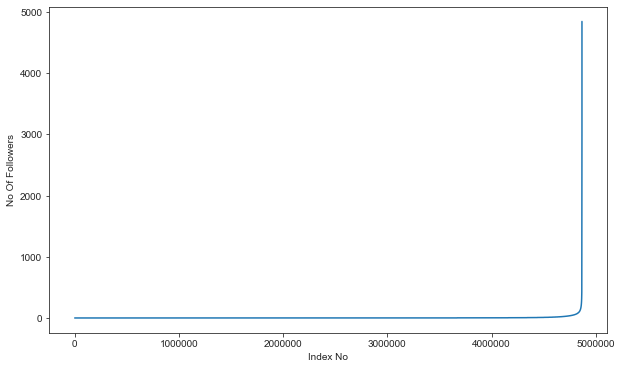

In [84]:
# Number of followers per person
indegree_dist = list(dict(G.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

In [45]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))


90 percentile value is 7.0
91 percentile value is 8.0
92 percentile value is 10.0
93 percentile value is 11.0
94 percentile value is 14.0
95 percentile value is 17.0
96 percentile value is 23.0
97 percentile value is 31.0
98 percentile value is 44.0
99 percentile value is 71.0
100 percentile value is 4841.0


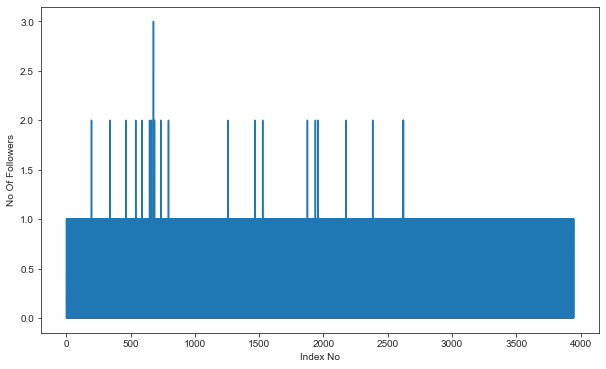

In [85]:
# Number of followers per person in test
indegree_dist_test = list(dict(Gtest.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist_test)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()


In [86]:
### 90-100 percentile in test
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist_test,90+i))

90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 3.0


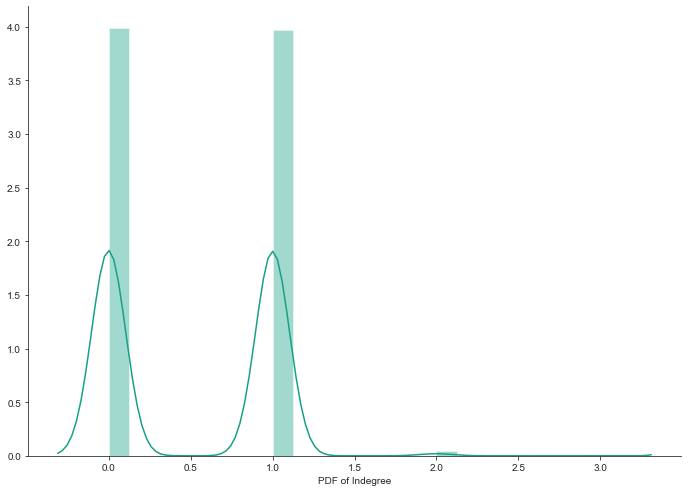

In [87]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist_test, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

In [46]:
### 99-100 percentile in training 
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 76.0
99.2 percentile value is 81.0
99.3 percentile value is 88.0
99.4 percentile value is 96.0
99.5 percentile value is 106.0
99.6 percentile value is 120.0
99.7 percentile value is 141.0
99.8 percentile value is 175.0
99.9 percentile value is 247.0
100.0 percentile value is 4841.0


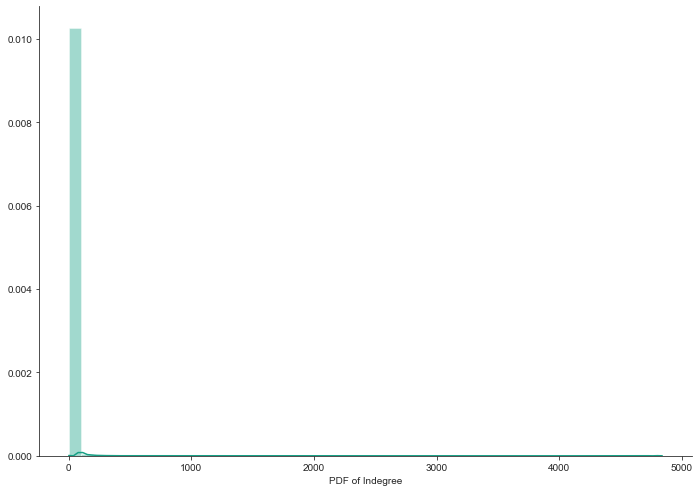

In [47]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

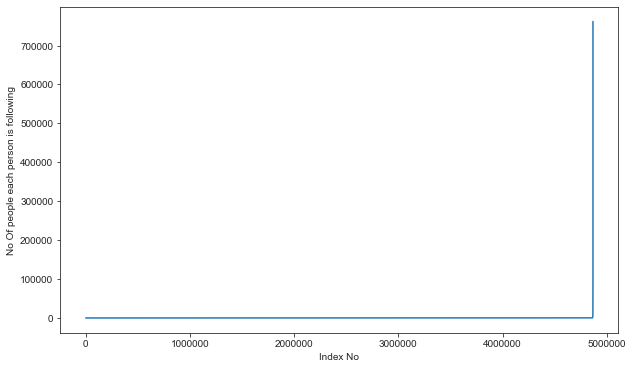

In [48]:
# Number of people each user is following
outdegree_dist = list(dict(G.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

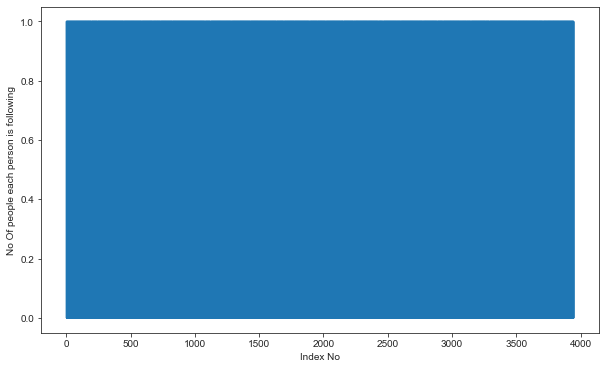

In [88]:
# Number of people each user is following
outdegree_dist_test = list(dict(Gtest.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist_test)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

In [49]:
### 90-100 percentile in training 
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 0.0
94 percentile value is 0.0
95 percentile value is 0.0
96 percentile value is 0.0
97 percentile value is 0.0
98 percentile value is 0.0
99 percentile value is 0.0
100 percentile value is 761793.0


In [89]:
### 90-100 percentile in test 
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist_test,90+i))


90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


In [50]:
### 99-100 percentile in training 
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 0.0
99.2 percentile value is 0.0
99.3 percentile value is 0.0
99.4 percentile value is 0.0
99.5 percentile value is 0.0
99.6 percentile value is 1.0
99.7 percentile value is 59.0
99.8 percentile value is 160.0
99.9 percentile value is 481.0
100.0 percentile value is 761793.0


In [90]:
### 99-100 percentile in test 
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist_test,99+(i/100)))

99.1 percentile value is 1.0
99.2 percentile value is 1.0
99.3 percentile value is 1.0
99.4 percentile value is 1.0
99.5 percentile value is 1.0
99.6 percentile value is 1.0
99.7 percentile value is 1.0
99.8 percentile value is 1.0
99.9 percentile value is 1.0
100.0 percentile value is 1.0


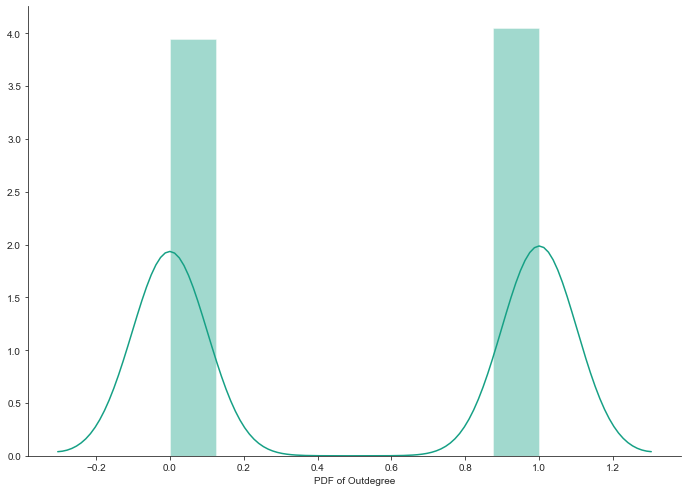

In [91]:
# plot for test
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist_test, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

AttributeError: module 'seaborn' has no attribute 'displot'

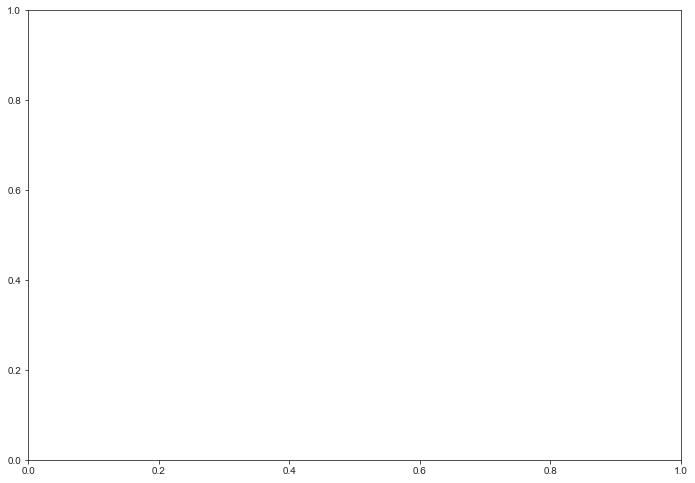

In [54]:
# plot for training 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

In [58]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 0 and % is 0.0


In [99]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
        sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist))

No of persons those are not following anyone are 4847566 and % is 99.59791548869808


In [93]:
print('No of persons having zero followers are' ,sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 4847566 and % is 0.0


In [96]:
count=0
for i in G.nodes():
    if len(list(G.predecessors(i)))==0 :
        if len(list(G.successors(i)))==0:
            count+=1
print('No of persons those are not not following anyone and also not having any followers are',count)

No of persons those are not not following anyone and also not having any followers are 0


In [100]:
#both followers + following
from collections import Counter
dict_in = dict(G.in_degree())
dict_out = dict(G.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

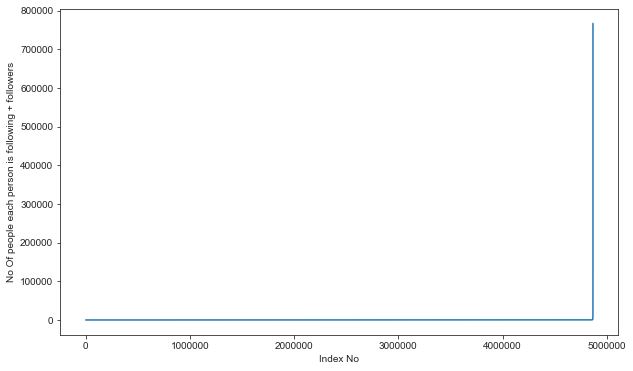

In [101]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [62]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 7.0
91 percentile value is 8.0
92 percentile value is 10.0
93 percentile value is 12.0
94 percentile value is 14.0
95 percentile value is 18.0
96 percentile value is 24.0
97 percentile value is 32.0
98 percentile value is 47.0
99 percentile value is 81.0
100 percentile value is 766634.0


In [63]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 87.0
99.2 percentile value is 96.0
99.3 percentile value is 105.0
99.4 percentile value is 118.0
99.5 percentile value is 136.0
99.6 percentile value is 164.0
99.7 percentile value is 211.0
99.8 percentile value is 310.0
99.9 percentile value is 645.0
100.0 percentile value is 766634.0


In [64]:
print('Min of no of followers + following is',in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()),' persons having minimum no of followers + following')

Min of no of followers + following is 1
2882534  persons having minimum no of followers + following


In [65]:
print('Max of no of followers + following is',in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()),' persons having maximum no of followers + following')

Max of no of followers + following is 766634
1  persons having maximum no of followers + following


In [66]:
print('No of persons having followers + following less than 10 are',np.sum(in_out_degree<10))

No of persons having followers + following less than 10 are 4469576


In [67]:
print('No of weakly connected components',len(list(nx.weakly_connected_components(G))))
count=0
for i in list(nx.weakly_connected_components(G)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes',count)

No of weakly connected components 1
weakly connected components wit 2 nodes 0


## First Sampling Method S1

In [32]:
###generating missing edges (fake edges) from given graph (training data points)

#getting all set of edges
###generating bad edges from given graph
#the dict will contain a tuple of 2 nodes as key and the value will be 1 is the nodes are connected else -1
if not os.path.isfile('missing_edges_final.p'):
    #getting all set of edges
    r = csv.reader(open('train_noheader.csv','r'))
    edges = dict()
    for edge in r: # i.e. edge is present in train data
        edges[(edge[0], edge[1])] = 1 # if edge is present in r 
        
        
    fake_edges = set([])
    while (len(fake_edges)<23946602):
        a=random.randint(1, 4867136)
        b=random.randint(1, 4867136)
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
            try:
                 # adding points who less likely to be friends
                if nx.shortest_path_length(G,source=a,target=b) > 2: # greater than 2 coz more dist. low prob. to become a frd. That is what we want as a data/edge to add or join.
                    fake_edges.add((a,b))
                else:
                    continue  
            except:  
                    fake_edges.add((a,b))              
        else:
            continue
    pickle.dump(fake_edges,open('missing_edges_final.p','wb'))
else:
    fake_edges = pickle.load(open('missing_edges_final.p','rb'))

In [33]:
len(edges)

23946602

In [34]:
len(missing_edges)

23946602

In [36]:
df_pos = pd.read_csv('train_pairs.csv', index_col=[0])
df_neg = pd.DataFrame(list(fake_edges), columns=['source', 'sink'])
print("Number of nodes in the graph with edges", df_pos.shape[0])
print("Number of nodes in the graph without edges", df_neg.shape[0])

y_train_pos = np.ones(len(df_pos))
y_train_neg = np.zeros(len(df_neg))
               

print('='*60)
print("Number of nodes in the train data graph with edges", df_pos.shape[0],"=",y_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", df_pos.shape[0],"=", y_train_neg.shape[0])

#removing header and saving
df_pos.to_csv('train_pos.csv',header=False, index=False)

df_neg.to_csv('train_neg.csv',header=False, index=False)


Number of nodes in the graph with edges 23946602
Number of nodes in the graph without edges 23946602
Number of nodes in the train data graph with edges 23946602 = 23946602
Number of nodes in the train data graph without edges 23946602 = 23946602


In [37]:
df_pos

,source,sink
0,540762,4366854
1,540762,4208653
2,540762,1313296
3,540762,94742
4,540762,1537559
...,...,...
23946597,3547024,1108982
23946598,3547024,2831094
23946599,3547024,554490
23946600,3547024,2973692


In [38]:
#final train data set

    
X_train_pos = pd.read_csv('train_pos.csv', names=['source', 'sink'])

X_train_neg = pd.read_csv('train_neg.csv', names=['source', 'sink'])

print('='*60)
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])


X_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))

X_train.to_csv('final_train.csv',header=False,index=False)

pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv',header=False,index=False)


Number of nodes in the train data graph with edges 23946602
Number of nodes in the train data graph without edges 23946602


In [39]:
print("Data points in train data",X_train.shape)
print("Shape of traget variable in train",y_train.shape)

Data points in train data (47893204, 2)
Shape of traget variable in train (47893204,)


In [46]:
y_train

array([1., 1., 1., ..., 0., 0., 0.])

## Another Sampling method based on common source nodes S3

In [2]:
training_d={}
with open('train.txt','r') as f:
    for line in f:
        neighbours=[int(i) for i in line.split()]
        training_d[neighbours[0]]=set([neighbours[i+1] for i in range(len(neighbours)-1)])

def get_train_sources_and_sinks(file):
    with open(file, 'r') as f:
        sources=set()
        sinks=set()
        for line in f:
            neighbours=[int(i) for i in line.split()]
            sources.add(neighbours[0])
            for i in range(len(neighbours)-1):
                sinks.add(neighbours[i+1])
        return sources,sinks

KeyboardInterrupt: 

In [ ]:
unique_sources_test = df_test['source'].unique() 
unique_sources_train = train_pairs['source'].unique()
len(unique_sources_train)
len(unique_sources_test)

In [42]:
#to find common sources between source in test and train data sets
unique_sources_train = set(unique_sources_train)
common_unique_sources = unique_sources_train.intersection(unique_sources_test)

In [ ]:
len(common_unique_sources)

In [ ]:
common_unique_sources_aslist = list(common_unique_sources)

print(common_unique_sources_aslist)

In [56]:
def positive_sampling():
    print("Positive sampling......")
    positive_samples=[]
    count=0
    for i in range(51100):
        if (count % 1000 == 0):
            print(count)
        count+=1
        source_random_index=random.randint(0,1999)
        source=(list(common_unique_sources))[source_random_index]
        origin_sinks=train_data[source] # origin_sinks is a set
        try:
            sink=random.choice(list(origin_sinks))
            positive_samples.append((source,sink))
        except:
            # print(origin_sinks)
            pass
    print(len(positive_samples))
    return positive_samples

In [57]:
pos_samp = positive_sampling()

Positive sampling......
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
51100


In [67]:
np.save('positive_samples-V3.npy',np.array(pos_samp))

In [62]:
def get_train_sources_and_sinks(file):
    with open(file, 'r') as train:
        sources=set()
        sinks=set()
        for line in train:
            neighbour_list=[int(i) for i in line.split()]
            sources.add(neighbour_list[0])
            for i in range(len(neighbour_list)-1):
                sinks.add(neighbour_list[i+1])
        return sources,sinks
train_sources,train_sinks=get_train_sources_and_sinks('train.txt')
print(len(train_sources))
print(len(train_sinks))

20000
4867136


In [63]:
def negative_sampling():
    print("Negative sampling......")
    negative_samples=[]
    count = 0
    for i in range(50020):
        if (count % 1000 == 0):
            print(count)
        count+=1
        source_random_index=random.randint(0,19999)
        source=(list(train_sources))[source_random_index]
        origin_sinks = train_data[source]
        sink=random.choice(list(train_sinks))
        if sink not in origin_sinks:
            negative_samples.append((source, sink))
    print(len(negative_samples))
    return negative_samples

In [64]:
neg_samp = negative_sampling()

Negative sampling......
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
50003


In [68]:
pos_df = pd.DataFrame(list(pos_samp))
neg_df = pd.DataFrame(list(neg_samp))

In [70]:

y_train_pos = np.ones(len(pos_samp_df))
y_train_neg = np.zeros(len(neg_df))
               

print('='*60)
print("Number of nodes in the train data graph with edges", pos_samp_df.shape[0],"=",y_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", neg_df.shape[0],"=", y_train_neg.shape[0])

#removing header and saving
pos_samp_df.to_csv('positive_samples-V3.csv',header=False,index=False)

neg_df.to_csv('negative_samples-V3.csv',header=False,index=False)

Number of nodes in the train data graph with edges 51100 = 51100
Number of nodes in the train data graph without edges 50003 = 50003


In [71]:
#final train data set

    
X_train_pos = pd.read_csv('positive_samples-V3.csv', names=['source', 'sink'])

X_train_neg = pd.read_csv('negative_samples-V3.csv', names=['source', 'sink'])

print('='*60)
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])


X_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))

X_train.to_csv('final_train-V3.csv',header=False,index=False)

pd.DataFrame(y_train.astype(int)).to_csv('train_y-V3.csv',header=False,index=False)

Number of nodes in the train data graph with edges 51100
Number of nodes in the train data graph without edges 50003
